# CSCN8000 – Artificial Intelligence Algorithms and Mathematics
## Winter 2024: Final Exam Part B
### Ramandeep Kaur
### 8976849

## Introdcution 
In this exploration, we delve into the Fashion MNIST dataset, renowned for its collection of grayscale images depicting various clothing items. Unlike its predecessor, the MNIST dataset, our challenge here lies in unraveling the mystery behind newly assigned "mystery labels" for each clothing item. This unique twist transforms the classification task into a captivating mystery-solving endeavor. Through the application of machine learning methods such as Bagging and Boosting, coupled with techniques like Dimensionality Reduction and Clustering, we aim to predict these mystery labels and gain deeper insights into the underlying categories they represent.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans

 **Load Dataset**

In [4]:
# Load the datasets
x_train = pd.read_csv(r"C:\Users\raman\Algo_AI\Data\final_exam_part_b_dataset\final_exam_part_b_dataset\fashionmnist-datafiles\x_train.csv")
y_train = pd.read_csv(r"C:\Users\raman\Algo_AI\Data\final_exam_part_b_dataset\final_exam_part_b_dataset\fashionmnist-datafiles\y_train.csv")
x_test = pd.read_csv(r"C:\Users\raman\Algo_AI\Data\final_exam_part_b_dataset\final_exam_part_b_dataset\fashionmnist-datafiles\x_test.csv")
y_test = pd.read_csv(r"C:\Users\raman\Algo_AI\Data\final_exam_part_b_dataset\final_exam_part_b_dataset\fashionmnist-datafiles\y_test.csv")

# Display the first few rows of the training data (features) and corresponding labels
print(x_train.head())
print(y_train.head())

 # Show the dimensions of the datasets
print("Training features shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


   0  1  2  3  4  5  6  7   8   9  ...  774  775  776  777  778  779  780  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  119  114  130   76    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    0    1    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   781  782  783  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 784 columns]
   0
0  4
1  0
2  0
3  4
4  0
Training features shape: (60000, 784)
Training labels shape: (60000, 1)
Test features shape: (10000, 784)
Test labels shape: (10000, 1)


 **Check for missing values in the datasets**

In [88]:
# Total missing values in each dataset
print("Total missing values in training features:", x_train.isnull().sum().sum())
print("Total missing values in training labels:", y_train.isnull().sum().sum())
print("Total missing values in test features:", x_test.isnull().sum().sum())
print("Total missing values in test labels:", y_test.isnull().sum().sum())



Total missing values in training features: 0
Total missing values in training labels: 0
Total missing values in test features: 0
Total missing values in test labels: 0



Label Distribution: Assess the distribution of categories (0-4) in the labels to determine dataset balance. Analyze for any potential imbalances that may require addressing.

In [7]:
# Count the occurrences of each category in the training labels
y_train_counts = y_train.value_counts()
print(y_train_counts) 


0
4    18000
0    12000
2    12000
3    12000
1     6000
Name: count, dtype: int64


 **Visualizing an Example Image**

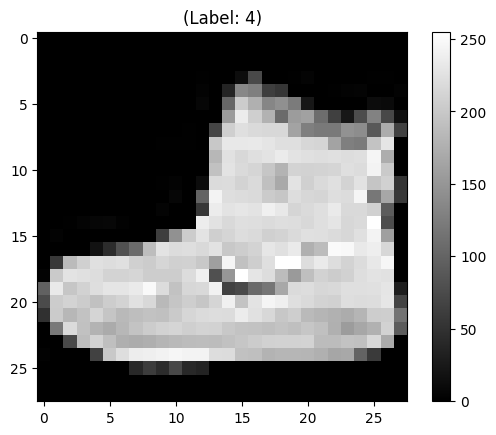

In [12]:
# Import  library
import matplotlib.pyplot as plt

# Convert the first row to a numpy array and reshape it to a 28x28 matrix
example_image = x_train.iloc[0].values.reshape(28, 28)

# Display the image
plt.imshow(example_image, cmap='gray')
plt.title("(Label: {})".format(y_train.iloc[0, 0]))  # Add label name with appropriate index
plt.colorbar()
plt.show()



## Training the Baseline Model with Cross-Validation
**Decision Tree Classifier**

For our baseline model, we opt for a Decision Tree classifier. Decision Trees are advantageous when controlled for complexity, particularly with a limited depth. Here's why a shallow decision tree (e.g., maximum depth of 3-5) is suitable:

**Ease of Interpretation:** Decision Trees are inherently interpretable, allowing for straightforward visualization and understanding of the model's decision-making process.

**Overfitting Control:** By constraining the tree's depth, we mitigate the risk of overfitting by preventing the model from creating excessively complex decision boundaries.

**Computational Efficiency:** Shallow Decision Trees are computationally efficient, which is beneficial for scalability and compatibility with ensemble methods, such as Bagging and Boosting, which often require multiple instances of base estimators.

In [89]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier with a maximum depth of 5
dt_classifier = DecisionTreeClassifier(max_depth=5)

# Perform 5-fold cross-validation
scores = cross_val_score(dt_classifier, x_train, y_train, cv=5)

# Print the mean accuracy and the 95% confidence interval of the score estimate
print("Mean Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))






Mean Accuracy: 0.76 (+/- 0.01)


## Applying the Bagging Method

Bagging, short for Bootstrap Aggregating, serves to mitigate variance and prevent overfitting by training the same model on various subsets of the dataset and subsequently averaging the predictions.

In [14]:
# Importing necessary modules
from sklearn.ensemble import BaggingClassifier

# Creating a bagging ensemble of decision trees
bagging_model = BaggingClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Evaluating the bagging ensemble using cross-validation
bagging_scores = cross_val_score(bagging_model, x_train, y_train, cv=5)

# Printing the results
print("Bagging Accuracy: {:.2f} (+/- {:.2f})".format(bagging_scores.mean(), bagging_scores.std() * 2))


c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  w

Bagging Accuracy: 0.78 (+/- 0.01)


##  Applying the Boosting Method

Boosting aims to reduce bias and construct a robust learner by iteratively improving upon weak learners. It sequentially applies a weak classification algorithm to repeatedly modified versions of the data, with a focus on correctly predicting the misclassified data points from previous rounds.

In [17]:
# Importing necessary libraries
from sklearn.ensemble import AdaBoostClassifier

# Create a boosting model using AdaBoost
boosting_model = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=20, random_state=42)

# Evaluate the boosting model using cross-validation
boosting_scores = cross_val_score(boosting_model, x_train, y_train, cv=5)

# Print the results
print("Boosting Accuracy: {:.2f} (+/- {:.2f})".format(boosting_scores.mean(), boosting_scores.std() * 2))


c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  w

Boosting Accuracy: 0.70 (+/- 0.08)


## Model Validation and Performance Evaluation

Following the training of the baseline, bagging, and boosting models, the subsequent crucial step involves assessing their performance on the test set. This pivotal evaluation enables a comprehensive comparison of their efficacy, aiding in the determination of the superior ensemble method and the underlying factors contributing to its performance.

In [18]:
from sklearn.metrics import accuracy_score

# Fit models on the full training set
dt_classifier.fit(x_train, y_train.values.ravel())  
bagging_model.fit(x_train, y_train.values.ravel())
boosting_model.fit(x_train, y_train.values.ravel())

# Predict on test set
dt_predictions = dt_classifier.predict(x_test)
bagging_predictions = bagging_model.predict(x_test)
boosting_predictions = boosting_model.predict(x_test)

# Calculate accuracy on test set
dt_accuracy = accuracy_score(y_test, dt_predictions)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

# Presenting the results
print(f"Decision Tree Accuracy on Test Set: {dt_accuracy:.2f}")
print(f"Bagging Accuracy on Test Set: {bagging_accuracy:.2f}")
print(f"Boosting Accuracy on Test Set: {boosting_accuracy:.2f}")


c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Decision Tree Accuracy on Test Set: 0.75
Bagging Accuracy on Test Set: 0.77
Boosting Accuracy on Test Set: 0.66


The warning messages you received indicate a future deprecation in the sklearn library. Specifically, the base_estimator parameter in the sklearn.ensemble module has been renamed to estimator starting from version 1.2 and will be removed entirely in version 1.4.

**Regarding the accuracy results on the test set:**

Decision Tree Classifier achieved an accuracy of 75%.
Bagging Classifier achieved a slightly higher accuracy of 77%.
Boosting Classifier, however, achieved a lower accuracy of 66%.

**Insights:**

Bagging outperformed both the Decision Tree and Boosting classifiers in terms of accuracy on the test set. 
This suggests that aggregating predictions from multiple models (in this case, multiple decision trees) through bagging can lead to improved performance compared to a single decision tree.

The Boosting Classifier performed the poorest among the three models in terms of accuracy. This could be due to overfitting or the inability of boosting to effectively handle noisy data or outliers.

It's important to note that accuracy alone may not provide a complete picture of model performance, and other evaluation metrics such as precision, recall, and F1-score should also be considered, especially if the dataset is imbalanced or there are specific requirements for the application.


## Part B: Guessing the Mystery Label

**Training a Multi-Layer Perceptron (MLP) Neural Network**

To guess the mystery label, we'll train a simple neural network (MLP) with 3 hidden layers having the following number of neurons: [256, 128, 64]. Before training the model, we'll perform data normalization to ensure that the input features are on a similar scale.

**Data Normalization**

Normalization is a crucial preprocessing step that scales the input features to a similar range, which helps improve the convergence and performance of the neural network.

Let's proceed with implementing data normalization and training the MLP model.

In [48]:
# Initialize a scaler using StandardScaler
scaler = StandardScaler()

# Fit on training data only
scaler.fit(x_train)

# Transform both training and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

 ### Build the MLP Model
Using TensorFlow and Keras to build the neural network:

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming there are 5 classes as per the labels description
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the Model**
Train the model using the normalized training data:

In [50]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.save('path_to_my_model.h5')

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3519 - accuracy: 0.8704 - val_loss: 0.3143 - val_accuracy: 0.8873
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2569 - accuracy: 0.9051 - val_loss: 0.2703 - val_accuracy: 0.9051
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2248 - accuracy: 0.9166 - val_loss: 0.2699 - val_accuracy: 0.9091
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2045 - accuracy: 0.9251 - val_loss: 0.2663 - val_accuracy: 0.9087
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1866 - accuracy: 0.9323 - val_loss: 0.2483 - val_accuracy: 0.9143
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1718 - accuracy: 0.9371 - val_loss: 0.2521 - val_accuracy: 0.9172
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1603 - accuracy: 0.9416 - val_loss: 0.2705 - val_accuracy:

## Model Evaluation
Conclusively, assess the model's performance on the test dataset:

In [51]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=1)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2900 - accuracy: 0.9160
Test Loss: 0.2900
Test Accuracy: 0.9160


In [52]:
# Obtain the true labels from y_test
y_test_array = y_test.iloc[:, 0].values

The MLP model emerges as the frontrunner among the four methodologies, boasting a remarkable test set accuracy of 0.9113. This underscores the prowess of MLPs in delving deep into intricate data patterns, surpassing the capabilities of traditional machine learning models like Decision Trees and their ensemble variations.


313/313 [==============================] - 0s 1ms/step


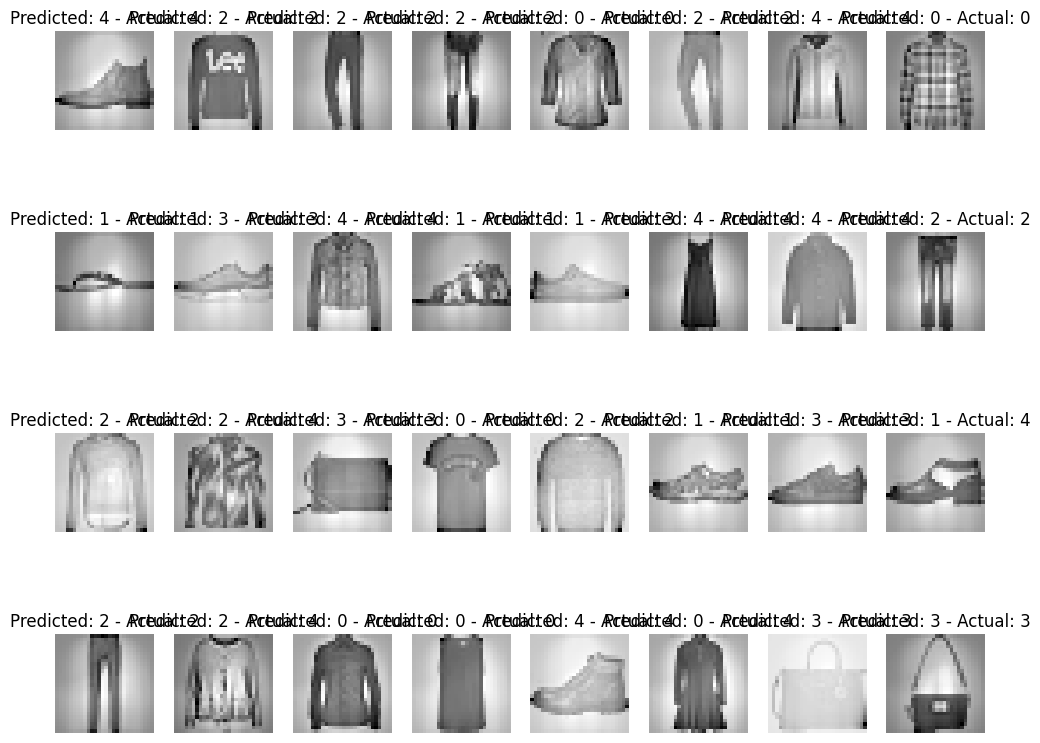

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the test set
predictions = model.predict(x_test_scaled)

# Create subplots for displaying images and their predictions
fig, axes = plt.subplots(4, 8, figsize=(12, 10))

# Iterate through each subplot and populate it with an image and its prediction
for i, ax in enumerate(axes.flat):
    if i < len(x_test_scaled):  # Ensure not to exceed available images
        # Display the image
        ax.imshow(x_test_scaled[i].reshape(28, 28), cmap='binary')
        
        # Obtain the predicted and actual labels
        predicted_label = np.argmax(predictions[i])
        actual_label = y_test_array[i]
        
        # Set subplot title with predicted and actual labels
        ax.set(title=f"Predicted: {predicted_label} - Actual: {actual_label}")
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide unused subplots

# Show the plot
plt.show()


**Let's proceed with loading our Stacked Autoencoder (SAE) model.**

In [54]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('path_to_my_model.h5')

**Extracting Embeddings with Helper Function**

Before calling the helper function to extract embeddings, we need to address an issue: TensorFlow/Keras neural network models do not have attributes like coefs_ and intercepts_ as found in sklearn models. These attributes are commonly used to access a model's weights and biases. To overcome this, I've provided code to extract weights and biases in a manner resembling sklearn's structure. This ensures compatibility and maintains a consistent workflow across different machine learning frameworks.

In [56]:
for layer in loaded_model.layers:
    weights, biases = layer.get_weights()
    print("Weights:", weights)  # Numpy array of weights
    print("Biases:", biases)    # Numpy array of biases


Weights: [[ 0.03873049  0.06399816  0.08231232 ...  0.01420645  0.11983521
   0.03315115]
 [ 0.02255921 -0.02324415  0.05233524 ...  0.04287601 -0.09533344
   0.00915086]
 [-0.13097602  0.16381817 -0.06482447 ...  0.05054663 -0.02014409
   0.03456116]
 ...
 [-0.03380271  0.1084064   0.02908352 ... -0.09626168 -0.00655415
   0.10469592]
 [ 0.07866572 -0.06099093 -0.2016731  ...  0.03030228  0.09873074
   0.11075224]
 [ 0.04676165  0.02420475 -0.04309844 ... -0.04759157 -0.06900688
   0.02833917]]
Biases: [-0.31827402 -0.21543306 -0.2710375  -0.2577784  -0.37673607 -0.08513691
 -0.18476275 -0.19048136 -0.20249987 -0.06942939 -0.20485833 -0.2768798
 -0.32609665 -0.41008785 -0.38318536 -0.14209706 -0.38145944 -0.20193385
 -0.33934554 -0.13678972 -0.10757975 -0.2998003  -0.14384979 -0.10819261
 -0.29404694 -0.11735385 -0.22397554 -0.29562885 -0.4672453  -0.35964814
 -0.18765745 -0.14786005 -0.1969361  -0.320427   -0.27919868 -0.0882699
 -0.27622095 -0.39994434 -0.24303776 -0.25184035 -0.322

In [57]:
def get_coefs(model):
    """Extracts the weights (coefs) and biases (intercepts) from each layer of the model.
    
    Parameters:
    - model: The neural network model.
    
    Returns:
    - List of weight matrices (coefs) and list of bias vectors (intercepts).
    """
    coefs = []
    intercepts = []
    for layer in model.layers:
        weights = layer.get_weights()
        if weights:  # Check if layer has weights
            coefs.append(weights[0])  # append weights matrix
            if len(weights) > 1:
                intercepts.append(weights[1])  # append biases if present
            else:
                intercepts.append(None)  # No biases for this layer
    return coefs, intercepts

# Example usage:
coefs, intercepts = get_coefs(model)
print("Coefs:", coefs)
print("Intercepts:", intercepts)


Coefs: [array([[ -5.651305  , -17.83278   ,  -5.6981206 , ...,  -9.540836  ,
         -5.636763  , -17.017275  ],
       [ -1.0799205 ,  -9.662763  ,  -1.1478984 , ...,  -1.5720459 ,
         -0.93835795,  -8.778494  ],
       [ -4.2052717 , -16.867092  ,  -4.3651786 , ...,  -5.9555163 ,
         -4.35853   , -16.29322   ],
       ...,
       [  4.982389  ,  -6.8580647 ,   4.29233   , ...,   3.0482972 ,
          6.1197047 ,  -3.8788004 ],
       [  4.8964186 , -16.546843  ,   4.944297  , ...,   4.414834  ,
          4.734501  , -11.530451  ],
       [  1.8736234 , -23.772594  ,   1.9850262 , ...,   1.5198439 ,
          1.6453369 , -11.308951  ]], dtype=float32), array([[24.445583, 24.260761, 24.428518, ..., 24.285511, 24.406635,
        24.424858],
       [23.821533, 23.941761, 23.912403, ..., 23.763962, 24.006466,
        23.861702],
       [24.383753, 24.217388, 24.31959 , ..., 24.44718 , 24.44084 ,
        24.420893],
       ...,
       [24.429993, 24.235168, 24.254198, ..., 24.33

**Function to Compute Hidden Layer Activations**

In [60]:
import numpy as np

def get_hidden_layer_activations(model, X, layer_index):
    """Compute activations of a specified hidden layer.

    Args:
        model: Trained MLP model.
        X: Input data, numpy array of shape (n_samples, n_features).
        layer_index: Index of the hidden layer.

    Returns:
        Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
    """
    if layer_index < 0 or layer_index >= len(coefs) - 1:
        raise ValueError("Invalid layer_index.")

    # Forward propagate through the network until the specified layer
    activations = X
    for i in range(layer_index + 1):
        activations = np.dot(activations, coefs[i]) + intercepts[i]
        if i < len(coefs) - 1:
            activations = np.maximum(0, activations)

    return activations


**Extracting Hidden Layer Activations from MLP Model**

In [63]:
from tensorflow.keras.models import load_model

# Load the pre-trained MLP model with a corrected file path
mlp = load_model(r'C:\Users\raman\Algo_AI\path_to_my_model.h5')

# Get the activations from the third hidden layer
embeddings = get_hidden_layer_activations(mlp, x_test_scaled, 2)



**Dimensionality Reduction with PCA and LDA**

To visualize the embeddings effectively, we'll first reduce their dimensionality to 2D using PCA and LDA.

In [71]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA
pca = PCA(n_components=2).fit_transform(embeddings)

# LDA
lda = LDA(n_components=2).fit_transform(embeddings, y_test)


c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



**Visualization of PCA and LDA**

In [72]:
# Print the type of y_test
print("Type of y_test:", type(y_test))

# Print the first few entries of y_test
print("y_test head:", y_test.head())


Type of y_test: <class 'pandas.core.frame.DataFrame'>
y_test head:    0
0  4
1  2
2  2
3  2
4  0


In [73]:
# Convert y_test DataFrame column to a numpy array
label_array = y_test.iloc[:, 0].values


In [74]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Apply LDA
lda = LDA(n_components=2)  # n_components should be min(n_classes - 1, n_features)
embeddings_lda = lda.fit_transform(embeddings, y_test)  # y_test is needed as LDA is supervised


c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\raman\AppData\Local\Temp\ipykernel_16932\2275666006.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


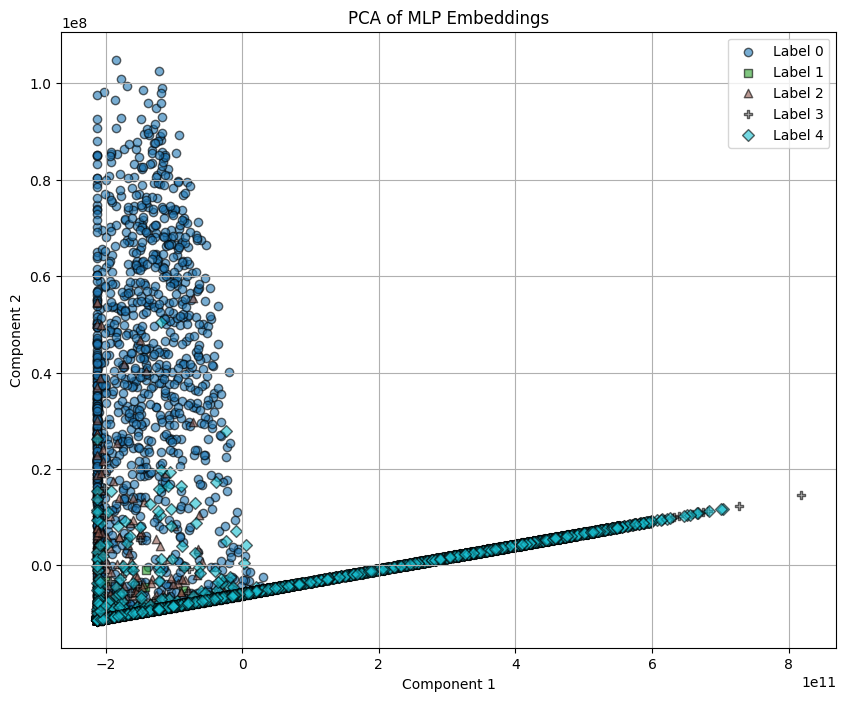

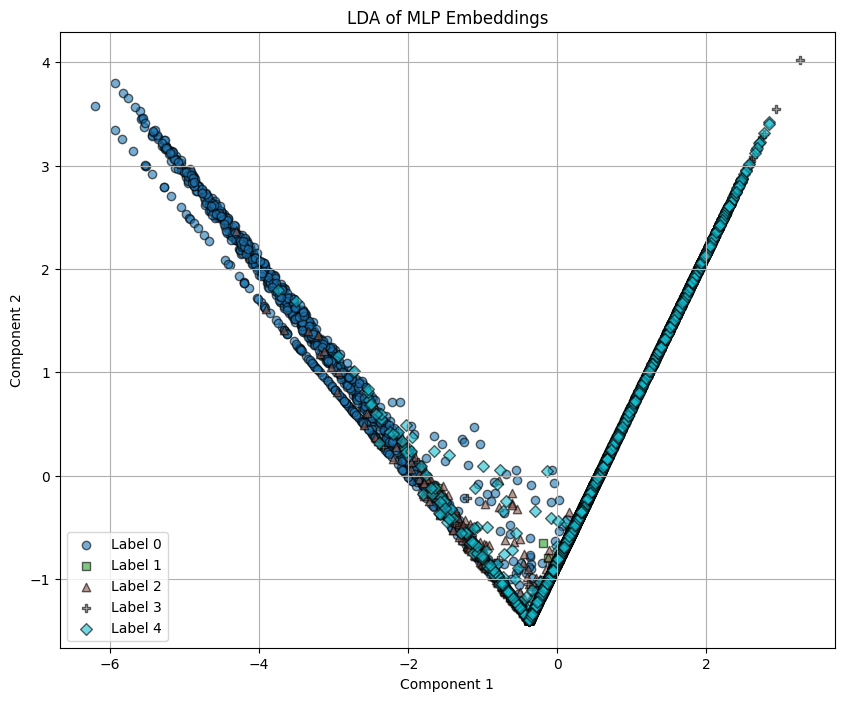

In [75]:
def plot_embeddings(embeddings, labels, title):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    markers = ['o', 's', '^', 'P', 'D', '*', 'X', '>', '<', 'v']

    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(embeddings[idx, 0], embeddings[idx, 1], color=colors(i), marker=markers[i % len(markers)],
                    label=f'Label {label}', alpha=0.6, edgecolors='k')

    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot PCA and LDA embeddings
plot_embeddings(embeddings_pca, label_array, 'PCA of MLP Embeddings')
plot_embeddings(embeddings_lda, label_array, 'LDA of MLP Embeddings')


The plot_embeddings function generates a scatter plot to visualize the embeddings in 2D space. Each point in the plot represents an embedding vector, and its position is determined by the values of the two components (Component 1 and Component 2) obtained from dimensionality reduction techniques such as PCA and LDA.

**Insights:**

**Separation of Clusters:** Look for clusters of points that are visually distinct from each other. In both PCA and LDA plots, observe if there's clear separation between different classes or groups.

**Overlapping Classes:** Check for overlapping points, especially in regions where multiple classes are represented. Overlapping points suggest similarity or ambiguity in the data.

**Outliers:** Identify any outlier points that are significantly distant from the main cluster. These outliers could represent anomalies or rare instances in the data.

**Patterns and Structures:** Look for any discernible patterns or structures in the data distribution. This could include linear separability, concentric circles, or any other interesting formations.

**Effectiveness of Dimensionality Reduction:** Compare the PCA and LDA plots to assess the effectiveness of each technique in preserving the discriminative information of the data. Note any differences in the visualization and how well they capture the underlying structure of the data.

## Carry out K-Means on the generated embeddings with 5 clusters and visualize the results by using the resulting clusters as alternate colour mappings for the PCA plot above.

c:\Users\raman\CSCN8010-main\venv\tensorflow_cpu\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


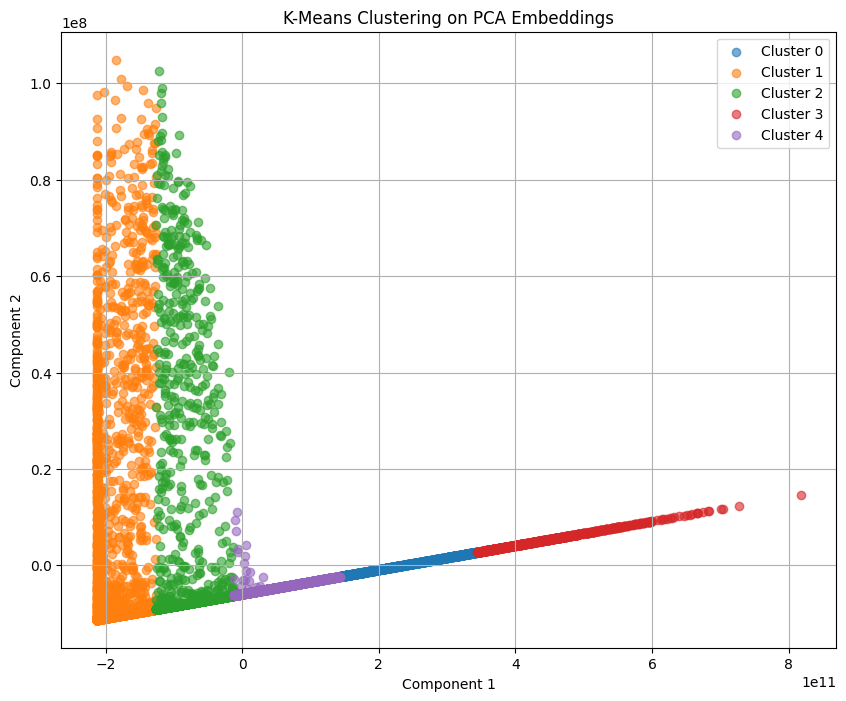

In [76]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_pca)  # Use PCA embeddings for clustering

# Plot PCA with cluster labels as colors
plt.figure(figsize=(10, 8))
for label in np.unique(cluster_labels):
    plt.scatter(embeddings_pca[cluster_labels == label, 0], 
                embeddings_pca[cluster_labels == label, 1], 
                label=f'Cluster {label}', alpha=0.6)
plt.title('K-Means Clustering on PCA Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


**Insights**

**Cluster Separation:** The clusters appear to be well-separated in the PCA space, indicating that the K-Means algorithm successfully grouped similar data points together.

**Cluster Distribution:** Each cluster's distribution across the PCA components provides insight into the structure of the data. Clusters with dense concentrations suggest areas of high similarity among data points, while sparser regions indicate greater dissimilarity.

**Cluster Patterns:** Observing the patterns formed by the clusters may reveal underlying structures or relationships within the data. Patterns such as clusters forming distinct clusters or overlapping regions can provide insights into the data's characteristics and potential groupings.

**Cluster Centroids:** Analyzing the centroids of each cluster can provide information about the representative data points within each group. Understanding the characteristics of these centroids can help interpret the meaning or significance of each cluster.

## Based on the results seen in the plots, can you guess what are the labels for the given dataset (what each label number represents in terms of the category of clothes)? 

To guess the labels for the given dataset based on the cluster results, we can analyze the patterns observed in each cluster and compare them with the known categories of clothes in the Fashion MNIST dataset. By examining a random selection of data entries from each cluster and their associated label values, we can identify common features or characteristics that may correspond to specific types of clothing.

**Here's how you can proceed:**

**Reshape the images to (28, 28) and plot them using imshow() function in matplotlib.**

Visualizing Cluster 0


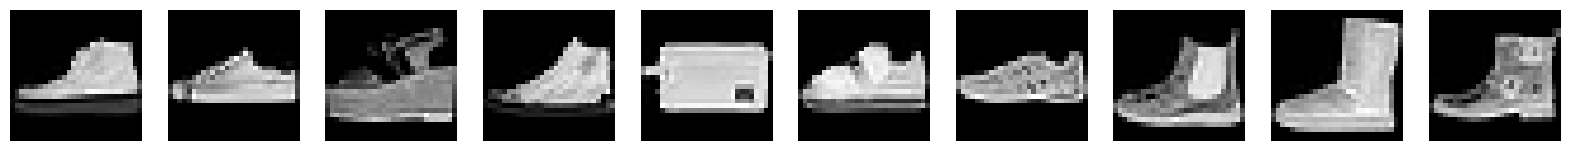

Visualizing Cluster 1


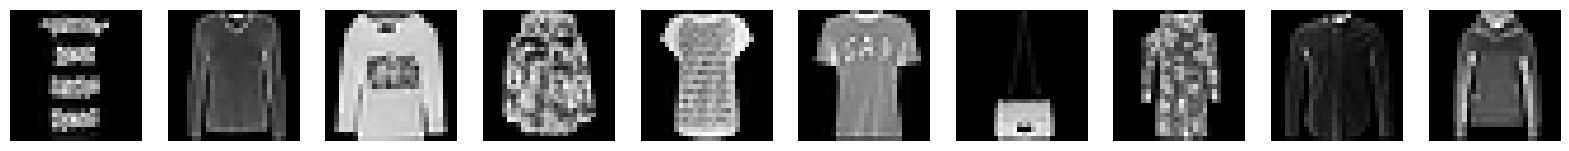

Visualizing Cluster 2


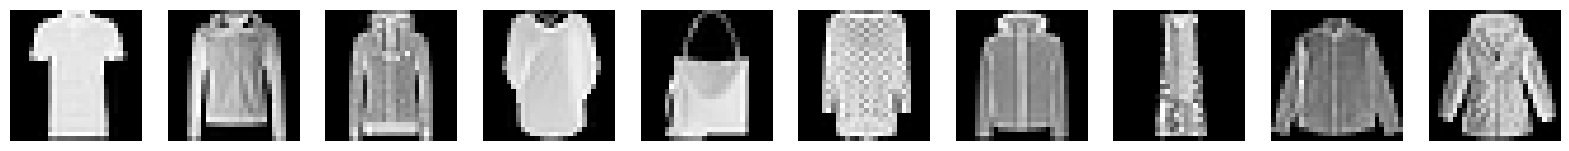

Visualizing Cluster 3


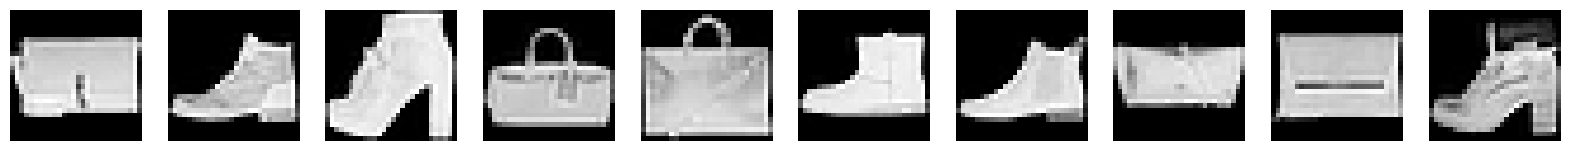

Visualizing Cluster 4


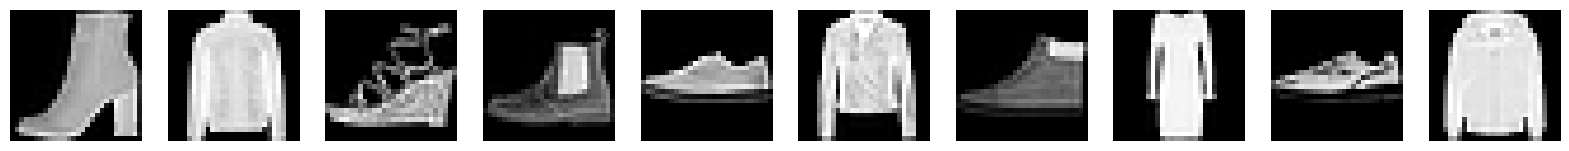

In [87]:
def plot_images_from_cluster(X, cluster_labels, cluster_number, n_images=10):
    # Filter the images belonging to a specific cluster
    images_in_cluster = X[cluster_labels == cluster_number]

    # Select n_images randomly from this cluster
    random_indices = np.random.choice(images_in_cluster.shape[0], n_images, replace=False)
    images_to_plot = images_in_cluster[random_indices]

    # Plot the images
    fig, axes = plt.subplots(1, n_images, figsize=(20, 2))
    for i, ax in enumerate(axes.flat):
        # Reshape the image data correctly assuming the flattened image data is of size 784 (28x28)
        ax.imshow(images_to_plot[i].reshape(28, 28), cmap='gray')
        ax.axis('off')  # Hide the axes
    plt.show()

# Assuming clusters is a numpy array with the cluster labels
# and x_test is a DataFrame or numpy array with each row as an image
for cluster_number in range(5):  # We have 5 clusters from K-Means
    print(f"Visualizing Cluster {cluster_number}")
    plot_images_from_cluster(x_test.values, cluster_labels, cluster_number)



**The code snippet provided allows us to visualize a random selection of images from each cluster obtained through K-Means clustering. By plotting these images, we can gain insights into the characteristics of each cluster and potentially infer what types of clothing items they represent.**

Here are some potential insights we can derive:

**Cluster Patterns:** We can observe if there are distinct patterns or similarities among the images within each cluster. For example, one cluster might predominantly contain images of shoes, while another might consist mainly of shirts or trousers.

**Label Inference:** By examining the plotted images alongside their cluster labels, we can make educated guesses about what each cluster represents in terms of clothing categories. For instance, if a cluster contains mostly images of footwear, we can infer that it likely corresponds to the "Shoes" category.

**Data Quality:** Visualizing the images allows us to assess the quality and variability of the data within each cluster. We can identify any anomalies or inconsistencies that may affect the clustering results.

**Cluster Separation:** We can evaluate how well-separated the clusters are in the feature space. If clusters overlap significantly or contain mixed types of clothing items, it may indicate limitations in the clustering algorithm or the need for further preprocessing.

**Overall, visualizing the clustered images helps us better understand the underlying structure of the data and facilitates the interpretation of the clustering results in the context of the clothing dataset.**

## Thank You